# Summary

Derivation of Lagrangian correctly parameterized in terms of $v^x$ and $v^z$.

The derivation starts with the co-Finsler metric tensor $g_*^{ij}(\mathbf{r},\mathbf{\widetilde{p}})$, and its inverse, which gives the Finsler metric tensor $g_{ij}(\mathbf{r},\mathbf{\widetilde{p}})$, i.e., parameterized by position $\mathbf{r}$ and covector slowness $\mathbf{\widetilde{p}}$. 

### Preliminaries

In [1]:
import sympy as sy, numpy as np, os
sy.init_printing(pretty_print=True,wrap_line=True)
from sympy import simplify, trigsimp, expand, factor, powsimp, \
    Eq, solve, solveset, sqrt, diff, Matrix, det, tan, cos, sin, sec, csc, \
    Abs, Rational, pi, re, im, atan, atan2, numer, denom, \
    lambdify, log, collect, cancel, integrate, Integral, \
    nroots, poly, N

from gmplib.utils import e2d
from gme.symbols import *
from gme.equations import Equations

from gmplib.plot_utils import GraphingBase


from functools import reduce

from scipy.optimize import root_scalar
from scipy.linalg import norm

# Won't work for eta<1
# rdotz = symbols('v^z',  real=True, positive=True)

In [2]:
# from notebook.services.config import ConfigManager
# cm = ConfigManager().update('notebook', {'limit_output': 20000})

In [3]:
import matplotlib as mpl, matplotlib.pyplot as plt
mpl.rc('font', size=14, family='Arial')
from matplotlib.colors import BoundaryNorm
from mpl_toolkits.axes_grid1 import make_axes_locatable
# from matplotlib.ticker import MaxNLocator

gr = GraphingBase()
job_name = 'demo'

# Derivations

## Basics

In [4]:
eta_ = Rational(1,2)
gmeq = Equations( eta=eta_,  mu=eta_/2, beta_type='sin', do_raw=True )

In [5]:
vx = symbols(r'x',  real=True)
vz = symbols(r'z',  real=True)

In [6]:
varphi_ = 1

The velocity vector has a column form, while the slowness covector takes a row form:

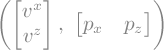

In [7]:
v_vec = Matrix([rdotx,rdotz])
p_covec = Matrix([px,pz]).T
v_vec,p_covec

## Leverage the metric tensor $g_*$

The co-Finsler metric $g_*^{ij}(\mathbf{r},\mathbf{\widetilde{p}})$ for the chosen $\eta=\tfrac{1}{2}$ or $\eta=\tfrac{3}{2}$, parameterized by position $\mathbf{r}$ and covector slowness $\mathbf{\widetilde{p}}$, aka defined on $\mathsf{T}^*\mathsf{M}$, is:

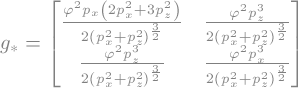

In [8]:
gstar_pxpz_eqn = simplify(gmeq.gstar_varphi_pxpz_eqn.subs({varphi_r:varphi}))
gstar_pxpz_eqn

Its inverse gives the dual metric $g_{ij}(\mathbf{r},\mathbf{\widetilde{p}})$, but still parameterized by position $\mathbf{r}$ and covector slowness $\mathbf{\widetilde{p}}$,

\begin{equation}
    g_{*}^{ij} = \left( g_{ij} \right)^{-1}
\end{equation}

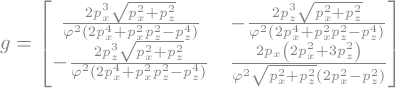

In [9]:
g_pxpz_eqn = simplify(Eq(g, gstar_pxpz_eqn.rhs.inv()))
g_pxpz_eqn

In [10]:
# simplify((g_pxpz_eqn.rhs)[1,0]*(gstar_pxpz_eqn.rhs)[1,0]+(g_pxpz_eqn.rhs)[1,1]*(gstar_pxpz_eqn.rhs)[1,1])

We can use $g_{ij}$ to lower the index of the velocity $v^j$ and map it into the slowness covector $p_i$:

\begin{equation}
    p_i = g_{ij} v^j
\end{equation}

Contracting the metric tensor to the velocity gives the slowness:

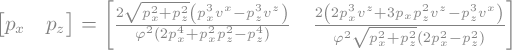

In [11]:
pcovec_eqn = Eq(p_covec, simplify(g_pxpz_eqn.rhs*v_vec).T)
# Eq(pcovec_eqn.lhs[0],pcovec_eqn.rhs[0]), Eq(pcovec_eqn.lhs[1],pcovec_eqn.rhs[1])
pcovec_eqn

Similarly, we can use $g^{ij}$ to raise the index of the slowness covector $p_i$ and map it into the velocity $v^j$:

\begin{equation}
    v^i = g^{ij} p_j
\end{equation}

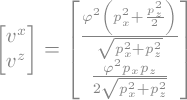

In [12]:
# gmeq.rdot_vec_eqn.subs({eta:gmeq.eta, varphi_r:varphi})
vvec_eqn = Eq(v_vec, simplify(p_covec*gstar_pxpz_eqn.rhs).T)
vvec_eqn

So we have the velocity vector $\mathbf{v}$ in terms of $\varphi(x)$ and the slowness covector $\mathbf{\widetilde{p}}$.  Writing each component out:

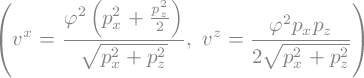

In [13]:
vx_px_pz_eqn = Eq(vvec_eqn.lhs[0],vvec_eqn.rhs[0])
vz_px_pz_eqn = Eq(vvec_eqn.lhs[1],vvec_eqn.rhs[1])
vx_px_pz_eqn, vz_px_pz_eqn

To check this result, we can solve the expressions for $\mathbf{\widetilde{p}}$ in terms of $\mathbf{v}$, which gives, e.g.,

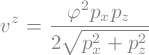

In [14]:
Eq(rdotz, solve(Eq(solve(Eq(pcovec_eqn.lhs[0],pcovec_eqn.rhs[0]),rdotx)[0],
          solve(Eq(pcovec_eqn.lhs[1],pcovec_eqn.rhs[1]),rdotx)[0]),rdotz)[0])

The (tangent of) the ray angle is given (by definition) by the ratio of these two components, which has the simple expression:

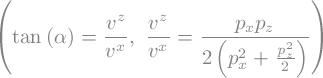

In [15]:
vzvx_ratio_eqn = Eq(vz_px_pz_eqn.lhs/vx_px_pz_eqn.lhs, vz_px_pz_eqn.rhs/vx_px_pz_eqn.rhs)
Eq(tan(alpha),vzvx_ratio_eqn.lhs), vzvx_ratio_eqn

## Expressions for $p_x(v^x,v^z)$ and $p_z(v^x,v^z)$ 

The velocity component ratio is a simple quadratic expression in the slowness components $p_x$ and $p_z$, which makes it easy to solve for one in terms of the other (along with the velocity components $v^x$ and $v^z$):

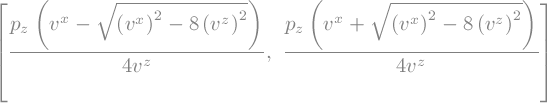

In [16]:
px_interim_solns = solve(vzvx_ratio_eqn,px)
px_interim_solns

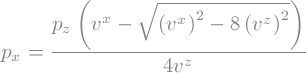

In [17]:
px_interim_soln = px_interim_solns[0]
px_interim_eqn = Eq(px, px_interim_soln)
px_interim_eqn

It will be useful to know the location, in both phase spaces, of a test point that lies "on-shell", i.e., on a solution of the system, which we set here. We can use this point to check the veracity of the expression for $p_x$:

In [18]:
if gmeq.eta<1:
    vx_,vz_ = 0.9,-0.2978
    px_,pz_ = 0.6630963505914919,-1.354973165538337
else:
    vx_,vz_ = Rational(105,100), Rational(21,100)
    vx_,vz_ = 1.05462010732076, 0.214847320357639
    px_,pz_ = 1.15,-1.
Eq(px, round(N(((px_interim_soln).subs({rdotx:vx_,rdotz:vz_}).subs({pz:pz_}))),5))

And also use it to check the expressions for $v^x$ and $v^z$:

In [19]:
vx_px_pz_eqn.subs({px:px_,pz:pz_,varphi:1}), vz_px_pz_eqn.subs({px:px_,pz:pz_,varphi:1})

The expression for $p_x$ in terms of $p_z$ and $(v^x,v^z)$ is linear in $p_z$; using it to eliminate $p_x$ in the expression for $v^x$ gives $v^x(v^z,p_z)$:

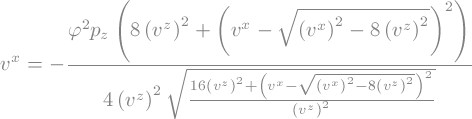

In [20]:
vx_eqn = (simplify( vx_px_pz_eqn.subs(e2d(px_interim_eqn)) ))
vx_eqn

Solving for $p_z$, which is just a simple rearrangement, gives $p_z(v^x,v^z)$, and $p_x(v^x,v^z)$ then follows trivially:

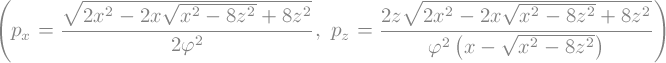

In [21]:
pz_vx_vz_eqn = Eq(pz, simplify( solve(vx_eqn, pz)[0]))
pz_vx_vz_eqn
if gmeq.eta<1:
    vz_tmp = symbols(r'v^z',  real=True, negative=True)
else:
    vz_tmp = symbols(r'v^z',  real=True, positive=True)
pz_vx_vz_simple_eqn = simplify(pz_vx_vz_eqn.subs({rdotz:vz_tmp}).subs({vz_tmp:rdotz}))

px_vx_vz_eqn = (px_interim_eqn.subs(e2d(pz_vx_vz_eqn)))
px_vx_vz_eqn 
px_vx_vz_simple_eqn = simplify(px_interim_eqn.subs(e2d(pz_vx_vz_simple_eqn)))

if gmeq.eta>1:
    px_vx_vz_eqn = px_vx_vz_simple_eqn
    pz_vx_vz_eqn = pz_vx_vz_simple_eqn
    
simplify(px_vx_vz_simple_eqn.subs({rdotx:vx,rdotz:vz})), pz_vx_vz_simple_eqn.subs({rdotx:vx,rdotz:vz})

The ratio of $-p_x(v^x,v^z)/p_z(v^x,v^z)$ should give an expression $\tan\beta$ consistent with what we know from more direct derivation, which it does:

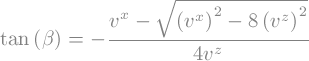

In [22]:
tanbeta_eqn = Eq(tan(beta), -px_vx_vz_eqn.rhs/pz_vx_vz_eqn.rhs)
tanbeta_eqn

Generate a test point below the critical angle $\beta_\mathrm{crit}$:

In [23]:
(Eq(pz, N(((pz_vx_vz_eqn.rhs)
        .subs({rdotx:vx_,rdotz:vz_})
        .subs({varphi:1,px:px_,pz:pz_})))),
 Eq(px, N(((px_vx_vz_eqn.rhs)
        .subs({rdotx:vx_,rdotz:vz_})
        .subs({varphi:1,px:px_,pz:pz_}))) ) )

Plug this $p$ coordinate in to check the surface tilt angle is sub-critical:

In [24]:
( Eq(tan(beta), round(N(tanbeta_eqn.rhs.subs({rdotx:vx_,rdotz:vz_})),3)), 
        Eq((beta), np.round(np.rad2deg(np.arctan(float(N(tanbeta_eqn.rhs.subs({rdotx:vx_,rdotz:vz_}))))),2)),
        Eq((beta_crit), np.round(np.rad2deg(np.arctan(float(N(gmeq.tanbeta_crit)))),2)) )

Lambdify the expressions for $p_x(v^x,v^z)$ and $p_z(v^x,v^z)$.

In [25]:
if gmeq.eta<1:
    px_vx_vz_lambda = lambda f,vx,vz:  \
        float((N(px_vx_vz_eqn.rhs.subs({varphi:f,rdotx:vx,rdotz:vz}))))
    pz_vx_vz_lambda = lambda f,vx,vz:  \
        float((N(pz_vx_vz_eqn.rhs.subs({varphi:f,rdotx:vx,rdotz:vz}))))
else:
    px_vx_vz_lambda = lambda f,vx,vz:  \
        float(re(N(px_vx_vz_eqn.rhs.subs({varphi:f,rdotx:vx,rdotz:vz}))))
    pz_vx_vz_lambda = lambda f,vx,vz:  \
        float(re(N(pz_vx_vz_eqn.rhs.subs({varphi:f,rdotx:vx,rdotz:vz}))))
p_vx_vz_lambda = lambda f,v: [px_vx_vz_lambda(f,v[0],v[1]),pz_vx_vz_lambda(f,v[0],v[1])]

## Lagrangian $L(v^x,v^z,\varphi)$ using $p(v)$ mappings and Legendre transform

Specify the Hamiltonian $H$ for the chosen value of $\eta$:

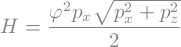

In [26]:
H_eqn = Eq(H, gmeq.H_eqn.rhs.subs({varphi_r:varphi, eta:gmeq.eta}))
H_eqn

Assert that the Lagrangian $L$ if the Legendre transform of this Hamiltonian, remembering not to hard-wire the inner product of $\mathbf{\widetilde{p}}$ and $\mathbf{v}$ to unity:

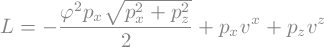

In [27]:
L_raw_eqn = simplify(Eq(L, px*rdotx + pz*rdotz - H_eqn.rhs))
L_raw_eqn

Use the mappings for $p_x(v^x,v^z)$ and $p_z(v^x,v^z)$ to reparameterize this Lagrangian into the form $L(v^x, v^z)$:

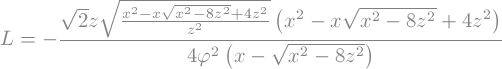

In [28]:
if gmeq.eta<1:
    L_interim_eqn = simplify( ((factor(L_raw_eqn.subs({px:-pz*tan(beta)}))).subs(e2d(tanbeta_eqn))
        .subs(e2d(px_vx_vz_eqn))).subs(e2d(pz_vx_vz_eqn)) )#.subs({rdotz:-Abs(rdotz)})
else:
    L_interim_eqn = simplify( ((factor(L_raw_eqn.subs({px:-pz*tan(beta)}))).subs(e2d(tanbeta_eqn))
        .subs(e2d(px_vx_vz_eqn))).subs(e2d(pz_vx_vz_eqn)) ).subs({rdotz:Abs(rdotz)})
L_interim_eqn.subs({rdotx:vx, rdotz:vz})

## Lagrangian $L$ in compact form

Make a brave attempt at simplifying the expression for the Lagrangian. Depending on the chosen value of $\eta$, define some shorthand substitutions that will coax SymPy to reduce the algebra a bit:

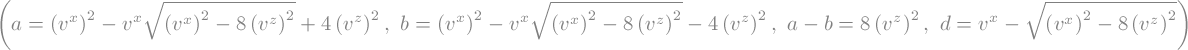

In [29]:
a = symbols(r'a',  real=True, positive=True)
b = symbols(r'b',  real=True, positive=True)
c = symbols(r'c',  real=True, positive=True)
d = symbols(r'd',  real=True, positive=True)
if gmeq.eta<1:
    a_subs_eqn = Eq(a, 
                    rdotx**2-rdotx*sqrt(rdotx**2-8*rdotz**2)+4*rdotz**2
                   )
    b_subs_eqn = Eq(b, 
                    rdotx**2-rdotx*sqrt(rdotx**2-8*rdotz**2)-4*rdotz**2
                   )
    c_subs_eqn = Eq(a-b, a_subs_eqn.rhs - b_subs_eqn.rhs)
    d_subs_eqn = Eq(d, 
                    rdotx-sqrt(rdotx**2-8*rdotz**2)
                   )
else:
    a_subs_eqn = Eq(a, 
                    sqrt(rdotx**2-24*rdotz**2)
                   )
    b_subs_eqn = Eq(b, 
                    sqrt(rdotx**2+24*rdotz**2)
                   )
    c_subs_eqn = Eq(a-b, a_subs_eqn.rhs - b_subs_eqn.rhs)
    d_subs_eqn = Eq(d, 
                    sqrt(16*rdotz**2+(a-rdotx)**2)
                   )
a_subs_eqn, b_subs_eqn, c_subs_eqn, d_subs_eqn

Deploy these substitutions to get a (very) compact form for L, albeit temporary:

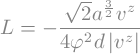

In [30]:
L_ab_eqn = Eq( L, simplify(simplify( (L_interim_eqn.rhs)
                                   .subs(e2d(a_subs_eqn,do_flip=True)).subs(e2d(b_subs_eqn,do_flip=True)) )
                          .subs(e2d(c_subs_eqn,do_flip=False)).subs(e2d(d_subs_eqn,do_flip=True))) )
L_ab_eqn

Revert the substitutions to see if this process has simplified $L$; here, we use the shorthand $x, z$ for $v^x,v^z$:

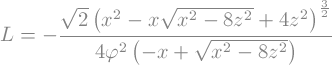

In [31]:
if gmeq.eta<1:
    L_manipulated_eqn = factor(((
        L_ab_eqn.subs(e2d(a_subs_eqn,do_flip=False))
                .subs(e2d(b_subs_eqn,do_flip=False))
                .subs(e2d(d_subs_eqn,do_flip=False))
    )))
    L_manipulated_eqn = ( L_manipulated_eqn.subs({Abs(rdotz):-rdotz}) )
else:
    L_manipulated_eqn = (((
        L_ab_eqn.subs(e2d(d_subs_eqn,do_flip=False))
                .subs(e2d(a_subs_eqn,do_flip=False))
                .subs(e2d(b_subs_eqn,do_flip=False))
    )))
    L_manipulated_eqn = simplify( L_manipulated_eqn.subs({Abs(rdotz):rdotz}) )
L_compact_eqn = L_manipulated_eqn
L_compact_eqn.subs({rdotx:vx, rdotz:vz})

In [32]:
# if gmeq.eta<1:
#     a_subs_eqn = Eq(a, sqrt(rdotx**2-rdotx*sqrt(rdotx**2-8*rdotz**2)-4*rdotz**2))
#     b_subs_eqn = Eq(b, sqrt(rdotx**2-rdotx*sqrt(rdotx**2-8*rdotz**2)+4*rdotz**2))
#     b2_subs_eqn = Eq(b*sqrt(2), sqrt(2*rdotx**2-2*rdotx*sqrt(rdotx**2-8*rdotz**2)+8*rdotz**2))
#     c_subs_eqn = Eq(c, sqrt(rdotx**2-8*rdotz**2))
#     c2_subs_eqn = Eq(c*sqrt(2), sqrt(2*rdotx**2-16*rdotz**2))
#     L_temp_eqn = simplify(L_manipulated_eqn
#                      .subs(e2d(a_subs_eqn,do_flip=True))
#                      .subs(e2d(b_subs_eqn,do_flip=True))
#                      .subs(e2d(b2_subs_eqn,do_flip=True))
# #                      .subs(e2d(c_subs_eqn,do_flip=True)) 
#                     ).subs(e2d(c_subs_eqn,do_flip=True)).subs(e2d(c2_subs_eqn,do_flip=True))
# else:
#     a_subs_eqn = Eq(a, sqrt(rdotx**2-24*rdotz**2) )
#     b_subs_eqn = Eq(b, sqrt(rdotx**2+24*rdotz**2) )
# #     b2_subs_eqn = Eq(b*sqrt(2), sqrt(2*rdotx**2-2*rdotx*sqrt(rdotx**2-8*rdotz**2)+8*rdotz**2))
#     c_subs_eqn = Eq(c, sqrt(16*rdotz**2+(a-rdotx)**2) )
#     L_temp_eqn = (L_manipulated_eqn
#                      .subs(e2d(a_subs_eqn,do_flip=True))
#                      .subs(e2d(b_subs_eqn,do_flip=True))
# #                      .subs(e2d(b2_subs_eqn,do_flip=True))
#                      .subs(e2d(c_subs_eqn,do_flip=True)) 
#                     )
# L_temp_eqn

# L_compact_eqn = (L_temp_eqn
#                    .subs(e2d(c_subs_eqn,do_flip=False))
#                    .subs(e2d(b_subs_eqn,do_flip=False))
#                    .subs(e2d(a_subs_eqn,do_flip=False)) )
# (L_compact_eqn.subs({rdotx:vx,rdotz:vz}))

Plug a test coordinate in rational-number form into the Lagrangian as a sanity check:

In [33]:
px_,pz_,vx_,vz_ 

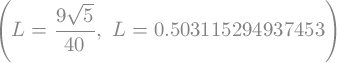

In [34]:
L_eqn_ = L_compact_eqn.subs({rdotx:(Rational(9,10) if gmeq.eta<1 else Rational(105,100)),
                             rdotz:(Rational(3,10) if gmeq.eta<1 else Rational(21,100)),varphi:varphi_})
L_eqn_, N(L_eqn_)

Lambdify the uncompact and compact forms we have for the Lagrangian.

In [35]:
L_raw_lambda = lambda f_,px_,pz_,vx_,vz_: \
                    float((N(L_raw_eqn.rhs.subs({varphi:f_,px:px_,pz:pz_,rdotx:vx_,rdotz:vz_}))))
L_lambda = lambda f_,vx_,vz_: \
                    float((N(L_compact_eqn.rhs.subs({varphi:f_,rdotx:vx_,rdotz:vz_}))))

## Geodesic spray coefficients  $G^i$

In this section, we derive the geodesic coefficients $G^i$, which are used both in constructing vector field of  the geodesic spray ${\mathbb{G}}$,

\begin{equation}
    {\mathbb{G}} := v^i \dfrac{\partial}{\partial{r^i}} - 2 G^i(\mathbf{v}) \dfrac{\partial}{\partial{v^i}}
\end{equation}

and the geodesic "F=ma" equation(s),

\begin{equation}
    \mathbf{\ddot{r}} + 2 G^i(\mathbf{\dot{r}}) = 0
\end{equation}

Here we have taken as given that $\mathbf{\dot{r}} = \mathbf{v}$.

Recap of the metric tensor $g$ and its dual $g_*$, both parameterized in terms of $\varphi(r^x)$, $p_x$ and $p_z$:

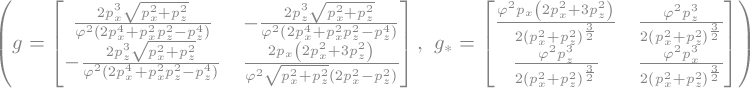

In [36]:
gstar_pxpz = gstar_pxpz_eqn.rhs.subs({varphi:varphi_rx})
g_pxpz = g_pxpz_eqn.rhs.subs({varphi:varphi_rx})
g_pxpz_eqn, gstar_pxpz_eqn

Define a derivative operator function that differentiates each component of a metric tensor in turn w.r.t. either $r^x$ or $r^i$:

In [37]:
def diff_p(g_,r_i):
    dg11dri = diff(g_[0,0],r_i)
    dg12dri = diff(g_[0,1],r_i)
    dg21dri = diff(g_[1,0],r_i)
    dg22dri = diff(g_[1,1],r_i)
    return simplify(Matrix([ [dg11dri,dg12dri], [dg21dri,dg22dri] ]))

Differentiate the metric tensor $g$ w.r.t. $r^x$ and $r^z$:

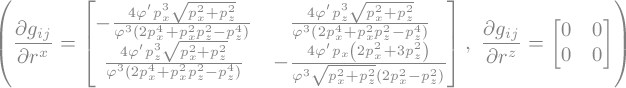

In [38]:
dgdrx = MatrixSymbol(r'\dfrac{\partial{g}_{ij}}{\partial{r^x}}',2,2)
dgdrz = MatrixSymbol(r'\dfrac{\partial{g}_{ij}}{\partial{r^z}}',2,2)

dgdrx_eqn = Eq(dgdrx, diff_p(g_pxpz,rx).subs({diff(varphi_rx,rx):d_varphi, varphi_rx:varphi}))
dgdrz_eqn = Eq(dgdrz, diff_p(g_pxpz,rz).subs({diff(varphi_rx,rx):d_varphi, varphi_rx:varphi}))
dgdrx_eqn, dgdrz_eqn

Now we construct the geodesic coefficients, which are given by:

\begin{equation}
    G^i(\mathbf{v}) = \dfrac{1}{4} g_*^{im}(\mathbf{v})\left\{
                    2\dfrac{\partial{g_{jm}}}{\partial{r^k}}(\mathbf{v}) 
                    - \dfrac{\partial{g_{jk}}}{\partial{r^m}}(\mathbf{v})
                        \right\} v^j v^k
\end{equation}

We split this expression into two halves (dropping the notation indicating $\mathbf{v}$ dependence for clarity)

\begin{equation}
    G^i = \dfrac{1}{2}\left\{ g_*^{im}
                    \dfrac{\partial{g_{jm}}}{\partial{r^k}}
                        \right\} v^j v^k
          -
          \dfrac{1}{4} g_*^{im}\left\{\dfrac{\partial{g_{jk}}}{\partial{r^m}} \right\} v^j v^k
\end{equation}

and construct each in turn, starting with 

\begin{equation}
    \dfrac{1}{2}\left\{ g_*^{im}
                    \dfrac{\partial{g_{jm}}}{\partial{r^k}}
                        \right\} v^j v^k
\end{equation}

The tensor contraction here can be treated as a pair of matrix multiplications (the partial derivative in $r^k$ generates one for $\partial{r^x}$ and one for $\partial{r^z}$), bearing in mind that the metric tensors are symmetrical (e.g., $g_{jm} = g_{mj}$):

\begin{equation}
    g_*^{im}\dfrac{\partial{g_{jm}}}{\partial{r^k}}
        \,\,\Leftrightarrow\,\, g_* \dfrac{\partial{g}}{\partial{r^k}}
        = \begin{bmatrix} g_* \dfrac{\partial{g}}{\partial{r^x}} 
                        \\ g_* \dfrac{\partial{g}}{\partial{r^z}} \end{bmatrix}
\end{equation}

Now, $g$ (and its respective dual $g_*$) are separable functions of position and velocity (respectively, slowness),  i.e.,

\begin{equation}
    g(\mathbf{r}, \mathbf{v}) = \dfrac{1}{\varphi^2(r^x)}\,\widetilde{g}(v^x,v^z)
    \,\,,\quad
    g_*(\mathbf{r}, \mathbf{\widetilde{p}}) = {\varphi^2(r^x)}\,\widetilde{g}_*(p_x,p_z)
\end{equation}

and by definition they are mutually inverse, $g_{*} = g^{-1}$.

Therefore the matrix multiplications simplify to

\begin{equation}
     g_* \dfrac{\partial{g}}{\partial{r^k}}
         = \dfrac{\partial{\left(1/\varphi^2(r^x)\right)}}{\partial{r^k}} \varphi^2(r^x)\, \widetilde{g}_* \, \widetilde{g}
         = \begin{bmatrix} -\dfrac{{2\varphi^{\prime}}}{\varphi}I  \\ 0 I  \end{bmatrix}
\end{equation}

where $I$ is the identity matrix and thus $0 I$ is the null matrix.

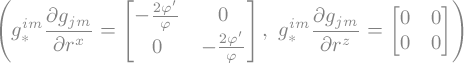

In [39]:
gstar_im = MatrixSymbol(r'{g}^{im}_{*}',2,2)
dgdrx_jm = MatrixSymbol(r'\dfrac{\partial{g}_{jm}}{\partial{r^x}}',2,2)
dgdrz_jm = MatrixSymbol(r'\dfrac{\partial{g}_{jm}}{\partial{r^z}}',2,2)

gstar_im_dgdrx_jm_eqn = Eq(gstar_im*dgdrx_jm, simplify((gstar_pxpz*dgdrx_eqn.rhs).subs({varphi_rx:varphi})))
gstar_im_dgdrz_jm_eqn = Eq(gstar_im*dgdrz_jm, simplify((gstar_pxpz*dgdrz_eqn.rhs).subs({varphi_rx:varphi})))
gstar_im_dgdrx_jm_eqn, gstar_im_dgdrz_jm_eqn

The first term in $G^i$ is therefore:

\begin{align}
    \dfrac{1}{2}\left\{ g_*^{im} \dfrac{\partial{g_{jm}}}{\partial{r^k}} \right\} v^j v^k
    & = -\dfrac{{2\varphi^{\prime}}}{\varphi}\begin{bmatrix} I_{jk}  \\ 0 I_{jk}  \end{bmatrix}^i v^j v^k \\
    & = -\dfrac{{2\varphi^{\prime}}}{\varphi}\begin{bmatrix} \delta_{jk}  \\ 0 \delta_{jk} \end{bmatrix}^i v^j v^k \\
    & = -\dfrac{{2\varphi^{\prime}}}{\varphi}\begin{bmatrix} v^k v^k  \\ 0  \end{bmatrix}^i \\
    & = -\dfrac{{2\varphi^{\prime}}}{\varphi}\begin{bmatrix} (v^x)^2 + (v^z)^2  \\ 0  \end{bmatrix}^i \\
    & = -\dfrac{{2\varphi^{\prime}}}{\varphi}\begin{bmatrix} |\mathbf{v}|^2  \\ 0  \end{bmatrix}^i 
\end{align}

where $|\cdot|^2$ is taken to mean the sum of the squared vector components, not the Finsler norm.

The second term in $G^i$ is more awkward. Writing out in full the contraction over $m$ (which is not a simple matrix multiplication this time):

\begin{equation}
    \dfrac{1}{4} g_*^{im}\left\{ \dfrac{\partial{g_{jk}}}{\partial{r^m}} \right\} 
     = 
       \dfrac{1}{4} g_*^{i1}\left\{ \dfrac{\partial{g_{jk}}}{\partial{r^x}} \right\} 
     + \dfrac{1}{4} g_*^{i2}\left\{ \dfrac{\partial{g_{jk}}}{\partial{r^z}} \right\} 
\end{equation}


which "simplifies" if we use the separability of the metric tensor functions:

\begin{align}
    \dfrac{1}{4} g_*^{im}\left\{\dfrac{\partial{g_{jk}}}{\partial{r^m}} \right\} 
     &= 
       \dfrac{1}{4} \left( 
               g_*^{i1}\left\{ 
                   \dfrac{\partial{\left(1/\varphi^2(r^x)\right)}}{\partial{r^k}} \widetilde{g}_{jk}
                   \right\}
             + g_*^{i2}\left\{ \left[0 I\right]_{jk} \right\} 
         \right) \\
     &= 
       \dfrac{1}{4} \left( 
               \varphi^2\, \widetilde{g}_*^{i1}\left\{ 
                   -\dfrac{2\varphi^{\prime}}{\varphi^3} \widetilde{g}_{jk}
                   \right\}
         \right) \\
     &= 
       -\dfrac{\varphi^{\prime}}{2\varphi} \, 
                \widetilde{g}_*^{i1}
                   \widetilde{g}_{jk}
\end{align}

Applying this term to the velocities, as per the construction of $G^i$, we have

\begin{equation}
        -\dfrac{\varphi^{\prime}}{2\varphi} \, 
                        \widetilde{g}_*^{i1} \widetilde{g}_{jk} v^j v^k
        =
        -\dfrac{\varphi^{\prime}}{2\varphi} \, 
                        {g}_*^{i1} {g}_{jk} v^j v^k
        =
        -\dfrac{\varphi^{\prime}}{2\varphi} \, 
                        F^2 {g}_*^{i1} 
        =
        -\dfrac{\varphi^{\prime}}{\varphi} \, 
                        L \,{g}_*^{i1}
\end{equation}

which uses the identities $F^2 = {g}_{jk} v^j v^k$ and $L = \tfrac{1}{2} F^2$.

Therefore the second term in $G^i$ reduces to:


\begin{equation}
    \dfrac{1}{4} g_*^{im}\left\{\dfrac{\partial{g_{jk}}}{\partial{r^m}} \right\} v^j v^k
        =
        -\dfrac{\varphi^{\prime}}{\varphi} \, 
                        L \,{g}_*^{i1}
\end{equation}

Putting the two terms together, we have a pretty simple form for $G^i$:


\begin{align}
    G^i 
    &= \dfrac{1}{2}\left\{ g_*^{im} \dfrac{\partial{g_{jm}}}{\partial{r^k}} \right\} v^j v^k
        - \dfrac{1}{4} g_*^{im}\left\{\dfrac{\partial{g_{jk}}}{\partial{r^m}} \right\} v^j v^k \\
    &= -\dfrac{{2\varphi^{\prime}}}{\varphi}\begin{bmatrix} |\mathbf{v}|^2  \\ 0  \end{bmatrix}^i 
        +\dfrac{\varphi^{\prime}}{\varphi} \, 
                        L \,{g}_*^{i1} \\
%    &= \dfrac{{\varphi^{\prime}}}{\varphi}
%        \left\{
%        -\dfrac{{2|v|^2}}{\varphi^2}  \delta_{i1} 
%        +L \,{g}_*^{i1} \right\} \\
    &= 
        \dfrac{{\varphi^{\prime}}}{\varphi} \left(
        -2 |\mathbf{v}|^2  \delta_{i1} 
        +  L\,{g}_*^{i1} \right)
\end{align}

or more explicitly

\begin{align}
    G^1 &=  \dfrac{{\varphi^{\prime}}}{\varphi} \left( 
            L\,{g}_*^{11} - 2|\mathbf{v}|^2 
            \right) \\
    G^2 &=   \dfrac{{\varphi^{\prime}}}{\varphi} L \,{g}_*^{21} 
\end{align}

Notice that the requisite order-2 Euler homogeneity in $\mathbf{v}$ of $G$ (for having a _full_ spray, see below) is obviously true here, because $g_*$ is order-0 homogeneous and $L$ is order-2 homogeneous.

What remains to be seen is whether we can approximate these coefficients and effectively disregard the terms in $L$. If we can, the $G^i$ would be simply quadratic expressions in $\mathbf{v}$ modulated by functions of horizontal position $r^x$ (in fact, $G^2$ would trivially become zero), and we would be dealing with a Berwald space, which allows for several helpful simplifications down the line.

Since geodesics are by definition "on-shell" (and if we're not deriving any further properties) we can assume $L=\tfrac{1}{2}$, so:


\begin{align}
    G^1 &=  \dfrac{{\varphi^{\prime}}}{2\varphi} \left( 
                {{g}_*^{11}} - 4|\mathbf{v}|^2
               \right) \\
    G^2 &=   \dfrac{{\varphi^{\prime}}}{2\varphi} \,{g}_*^{21} 
\end{align}


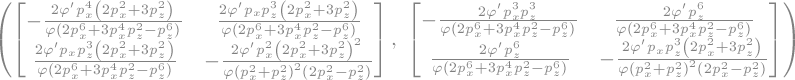

In [40]:
gstar_1m_dgrm_jk = simplify(gstar_pxpz[0,0]*dgdrx_eqn.rhs + gstar_pxpz[0,1]*dgdrz_eqn.rhs) \
                                    .subs({diff(varphi_rx,rx):d_varphi, varphi_rx:varphi})
gstar_2m_dgrm_jk = simplify(gstar_pxpz[1,0]*dgdrx_eqn.rhs + gstar_pxpz[1,1]*dgdrz_eqn.rhs) \
                                    .subs({diff(varphi_rx,rx):d_varphi, varphi_rx:varphi})
gstar_1m_dgrm_jk, gstar_2m_dgrm_jk

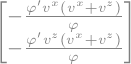

In [41]:
gstar_im_dgdrk_jm_vjvk = simplify( Rational(1,2)*((v_vec.T*gstar_im_dgdrx_jm_eqn.rhs*v_vec[0])
                                                 +(v_vec.T*gstar_im_dgdrx_jm_eqn.rhs*v_vec[1])) ).T \
                                    .subs({diff(varphi_rx,rx):d_varphi, varphi_rx:varphi})
gstar_im_dgdrk_jm_vjvk

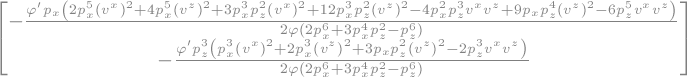

In [42]:
gstar_im_dgdrm_jk_vjvk = Matrix([ simplify( Rational(1,4)*((v_vec.T*(gstar_1m_dgrm_jk*v_vec))[0]) ),
                                  simplify( Rational(1,4)*((v_vec.T*(gstar_2m_dgrm_jk*v_vec))[0]) ) ])
gstar_im_dgdrm_jk_vjvk

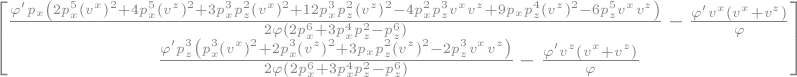

In [43]:
G_i_pxpz = (factor(gstar_im_dgdrk_jm_vjvk - gstar_im_dgdrm_jk_vjvk))
G_i_pxpz

In [44]:
G_i_vxvz = ( ( G_i_pxpz.subs(e2d(px_vx_vz_eqn)).subs(e2d(pz_vx_vz_eqn)) ).subs({rdotx:vx,rdotz:vz}) )

In [45]:
Gi = MatrixSymbol(r'G^i',2,1)
G1 = symbols(r'G^1', real=True)
G2 = symbols(r'G^2', real=True)

In [46]:
a = symbols(r'a',  real=True)
b = symbols(r'b',  real=True)
if gmeq.eta<1:
    a_subs_eqn = Eq(a,sqrt(vx**2-8*vz**2))
else:
    a_subs_eqn = Eq(a,sqrt(vx**2-24*vz**2))
# b_subs_eqn = Eq(b,vx**2-x*sqrt(vx**2-8*vz**2)+4*z**2)
# b_subs_eqn = Eq(b,-a*x+x**2+4*z**2)
# e2d(a_subs_eqn,do_flip=True) #, e2d(b_subs_eqn,do_flip=True)

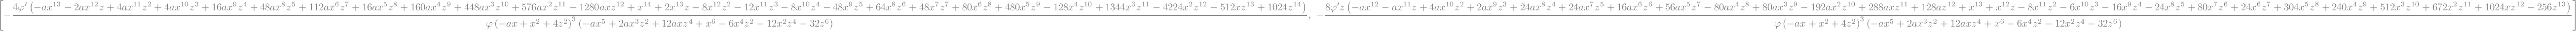

In [47]:
if gmeq.eta<1:
    G_i_vxvz_a = [
        ( factor((G_i_vxvz[0])).subs(e2d(a_subs_eqn,do_flip=True)) ),
        ( factor((G_i_vxvz[1])).subs(e2d(a_subs_eqn,do_flip=True)) )
    ]
else:
    G_i_vxvz_a = [
        ( simplify((G_i_vxvz[0])).subs(e2d(a_subs_eqn,do_flip=True)) ),
        ( simplify((G_i_vxvz[1])).subs(e2d(a_subs_eqn,do_flip=True)) )
    ]
G_i_vxvz_eqn = Eq(Gi, Matrix([G_i_.subs(e2d(a_subs_eqn,do_flip=False)) for G_i_ in G_i_vxvz_a]))
G_i_vxvz_a

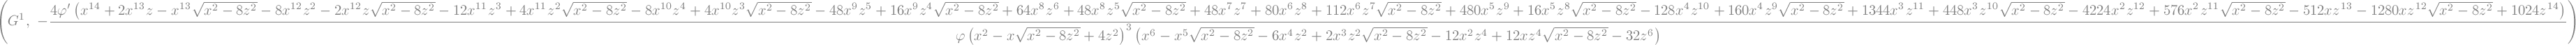

In [48]:
G1, G_i_vxvz_eqn.rhs[0]

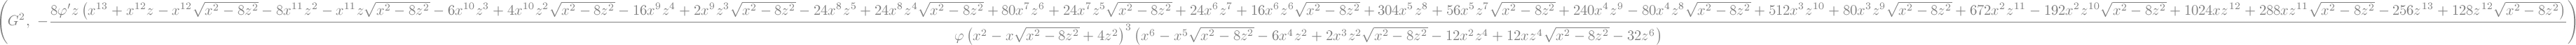

In [49]:
G2, G_i_vxvz_eqn.rhs[1]

Check that we are dealing with a full geodesic spray, not a semi-spray, i.e., check that:

\begin{equation}
    G^i(\mathbf{r},\lambda\mathbf{v}) = \lambda^2 G^i(\mathbf{r},\mathbf{v}) \,\,,\qquad \lambda>0
\end{equation}

In [50]:
lmda = symbols(r'\lambda',  real=True, positive=True)
( factor( (G_i_vxvz_eqn.rhs[0]).subs({vx:lmda*vx, vz:lmda*vz}) )/(G_i_vxvz_eqn.rhs[0]),
  factor( (G_i_vxvz_eqn.rhs[1]).subs({vx:lmda*vx, vz:lmda*vz}) )/(G_i_vxvz_eqn.rhs[1]) )

which is the case.

# Tests

## Rederivation of metric tensor $g$ from $L$

In [51]:
sub_ = {rdotx:vx_, rdotz:vz_, px:px_,pz:pz_, varphi:varphi_}
sub_

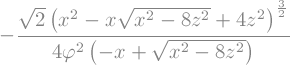

In [52]:
L_ = L_compact_eqn.rhs
L_.subs({rdotx:vx, rdotz:vz})

Differentiate $L = \tfrac{1}{2}F^2$ with respect to velocity $v$, remembering that $\varphi(x)$ is a function of horizontal position $x$ only, and is not dependent on $v$.

In [53]:
dLdv = Matrix([ diff(L_,rdotx), diff(L_,rdotz) ]) 
d2Ldvxdvx = diff(dLdv[0],rdotx)
d2Ldvxdvz = diff(dLdv[0],rdotz)
d2Ldvzdvx = diff(dLdv[1],rdotx)
d2Ldvzdvz = diff(dLdv[1],rdotz)
d2Ldv2 = (Matrix([[d2Ldvxdvx,d2Ldvxdvz],[d2Ldvzdvx,d2Ldvzdvz]]))
g_from_L_eqn = simplify(Eq(g, d2Ldv2))

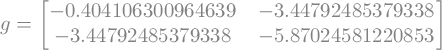

In [54]:
g_p_ = g_pxpz_eqn.subs(sub_)
g_p_

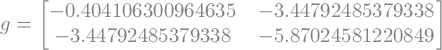

In [55]:
g_v_ = Eq(g, N(g_from_L_eqn.rhs.subs(sub_)))
g_v_

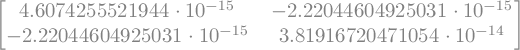

In [56]:
g_v_.rhs - g_p_.rhs

In [57]:
px_alt_, pz_alt_ = 0.7, -1
vx_alt_ = vx_px_pz_eqn.rhs.subs({px:px_alt_,pz:pz_alt_,varphi:varphi_})
vz_alt_ = vz_px_pz_eqn.rhs.subs({px:px_alt_,pz:pz_alt_,varphi:varphi_})
vx_alt_,vz_alt_
sub_alt_ = {rdotx:vx_alt_, rdotz:vz_alt_, px:px_alt_,pz:pz_alt_, varphi:varphi_}
sub_alt_

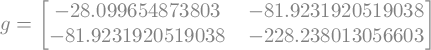

In [58]:
g_p_ = g_pxpz_eqn.subs(sub_alt_)
g_p_

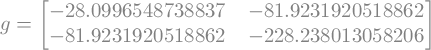

In [59]:
g_v_ = Eq(g, N(g_from_L_eqn.rhs.subs(sub_alt_)))
g_v_

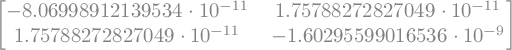

In [60]:
g_v_.rhs - g_p_.rhs

## Local tests

In [61]:
round(N(px_vx_vz_eqn.rhs.subs({rdotx:vx_,rdotz:vz_,varphi:varphi_})),3), \
round(N(pz_vx_vz_eqn.rhs.subs({rdotx:vx_,rdotz:vz_,varphi:varphi_})),3)

In [62]:
px_ = N(px_vx_vz_eqn.rhs.subs({rdotx:vx_,rdotz:vz_}).subs({varphi:varphi_}))
pz_ = N(pz_vx_vz_eqn.rhs.subs({rdotx:vx_,rdotz:vz_}).subs({varphi:varphi_}))
px_, pz_

In [63]:
px_ = px_vx_vz_lambda(varphi_,vx_,vz_)
pz_ = pz_vx_vz_lambda(varphi_,vx_,vz_)
px_, pz_

In [64]:
Matrix([px_,pz_]).dot(Matrix([vx_,vz_]))

In [65]:
sub_ = {rdotx:vx_,rdotz:vz_,varphi:varphi_, px:px_, pz:pz_}

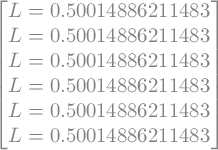

In [66]:
Matrix([
    N(L_raw_eqn.subs(sub_)), 
    Eq(L,L_raw_lambda(varphi_,px_,pz_,vx_,vz_)),
    N(L_interim_eqn.subs(sub_)), 
    N(L_manipulated_eqn.subs(sub_)), 
    N(L_compact_eqn.subs(sub_)), 
    Eq(L,L_lambda(varphi_,vx_,vz_))
])

## Indicatrix/figuratrix tests

In [67]:
if gmeq.eta<1:
    varphi_plot_ = 1
else:
    varphi_plot_ = 1

In [68]:
sub_plot_ = {varphi_r:varphi_plot_, eta:gmeq.eta}

In [69]:
H_lambdified = lambdify([varphi,px,pz],H_eqn.rhs)
H_lambda = lambda f_,px_,pz_: float(N(H_lambdified(f_,px_,pz_)))

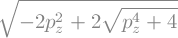

In [70]:
H_parametric_eqn = Eq((2*gmeq.H_eqn.rhs)**2,1).subs(sub_plot_)
px_H_solns = [simplify(sqrt(soln)) for soln in solve( H_parametric_eqn ,px**2)]
pz_H_solns = [simplify(sqrt(soln)).subs({Abs(px):px}) for soln in solve( H_parametric_eqn ,pz**2)]
px_H_soln_ = [soln for soln in px_H_solns if Abs(sy.im(N(soln.subs({pz:1}))))<1e-10][0]
px_H_lambda = lambdify( [pz], simplify(px_H_soln_) )
numer(simplify(px_H_soln_))

In [71]:
pz_min_eqn = Eq(pz_min, 0)
px_min_eqn = Eq(px_min, 
                sqrt(solve(Eq((
                solve(Eq(4*gmeq.H_eqn.rhs**2,1).subs(sub_plot_),pz**2)[:])[0],0)
                               ,px**2)[1]))
tanbeta_max_eqn = Eq(tan(beta_max),sy.oo)
tanbeta_max = None
px_min_ = round(float(N(px_min_eqn.rhs.subs(sub_plot_))),4)
pz_min_ = round(float(N(pz_min_eqn.rhs.subs(sub_plot_))),8)
px_min_, -pz_min_, np.rad2deg(np.arctan(px_min_/pz_min_)) if pz_min_>0 else None

(1.0, -0.0, None)

In [72]:
v_from_gstar_lambda_tmp = lambdify((px,pz),
                N(gmeq.gstar_varphi_pxpz_eqn.subs(sub_plot_).rhs*Matrix([px,pz])))
v_from_gstar_lambda = lambda px_,pz_: (v_from_gstar_lambda_tmp(px_,pz_)).flatten()
v_lambda = lambda pa: np.array([(v_from_gstar_lambda(px_,pz_)) for px_,pz_ in pa])
# gmeq.gstar_varphi_pxpz_eqn

In [73]:
if gmeq.eta==Rational(3,2):
    pz_max_ = 100
else:
    pz_max_ = 50
pz_array = -10**np.linspace(np.log10(pz_min_ if pz_min_>0 else 1e-1), np.log10(pz_max_), 50)
px_array = px_H_lambda(pz_array)
p_array = np.vstack([px_array,pz_array]).T
p_array = p_array[np.isfinite(p_array[:,0]) & np.isfinite(p_array[:,1])]

modp_array = norm(p_array,axis=0)
tanbeta_crit = float(N(gmeq.tanbeta_crit_eqn.rhs.subs({eta:gmeq.eta})))

p_infc_array = p_array[np.abs(p_array[:,0]/p_array[:,1])<tanbeta_crit]
p_supc_array = p_array[np.abs(p_array[:,0]/p_array[:,1])>=tanbeta_crit]

v_infc_array = v_lambda(p_infc_array)
v_supc_array = v_lambda(p_supc_array)
v_array = v_lambda(p_array)
# v_array

In [74]:
p_from_v_array = np.array([p_vx_vz_lambda(varphi_plot_,v_) for v_ in v_array[::1]])
len(p_from_v_array), len(p_array)

In [75]:
p_from_v_trunc_raw_array = p_from_v_array[np.isfinite((p_from_v_array[:,0])) 
                                          & np.isfinite((p_from_v_array[:,1]))]
v_from_v_trunc_raw_array = v_array[np.isfinite((p_from_v_array[:,0])) 
                                   & np.isfinite((p_from_v_array[:,1]))]
len(p_from_v_trunc_raw_array), len(v_from_v_trunc_raw_array)

In [76]:
p_trunc1_array = p_from_v_trunc_raw_array[1:]
p_trunc0_array = p_from_v_trunc_raw_array[:-1]
p_trunc1_array-p_trunc0_array
p_from_v_trunc_array = p_trunc0_array[(p_trunc1_array[:,1]-p_trunc0_array[:,1])<0]
v_trunc0_array = v_from_v_trunc_raw_array[:-1]
v_from_v_trunc_array = v_trunc0_array[(p_trunc1_array[:,1]-p_trunc0_array[:,1])<0]

In [77]:
p_from_v_infc_array = p_from_v_trunc_array[np.abs(p_from_v_trunc_array[:,0]
                                            /p_from_v_trunc_array[:,1])<tanbeta_crit]
p_from_v_supc_array = p_from_v_trunc_array[np.abs(p_from_v_trunc_array[:,0]
                                            /p_from_v_trunc_array[:,1])>=tanbeta_crit]

In [78]:
[np.round(np.dot(p_,v_),3) for p_,v_ in (zip(p_from_v_infc_array,v_infc_array))]

In [79]:
[np.round(np.dot(p_,v_),3) for p_,v_ in (zip(p_infc_array,v_infc_array))]

In [80]:
[round(p_[0]*v_[0]+p_[1]*v_[1],3) for p_,v_ in (zip(p_infc_array,v_infc_array))]

In [81]:
[np.round(H_lambda(varphi_plot_, px_,pz_),4) for px_,pz_ in p_from_v_infc_array]

In [82]:
[np.round(H_lambda(varphi_plot_, px_,pz_),4) for px_,pz_ in p_infc_array]

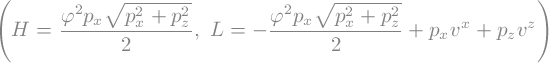

In [83]:
H_eqn, L_raw_eqn

In [84]:
[round(H_eqn.rhs.subs({varphi:varphi_plot_,px:px_,pz:pz_}),2) 
         for [px_,pz_],[vx_,vz] in zip(p_infc_array,v_infc_array)]

In [85]:
[round((px*rdotx+pz*rdotz).subs({px:p_[0],pz:p_[1],rdotx:v_[0],rdotz:v_[1]}),3) 
         for (p_,v_) in zip(p_infc_array,v_infc_array)]

In [86]:
[np.round(L_raw_lambda(varphi_plot_, *p_,*v_),4) 
         for (p_,v_) in zip(p_infc_array,v_infc_array)]

In [87]:
# [np.round(L_lambda(varphi_, *v_),4) for v_ in v_infc_array]

# Plot

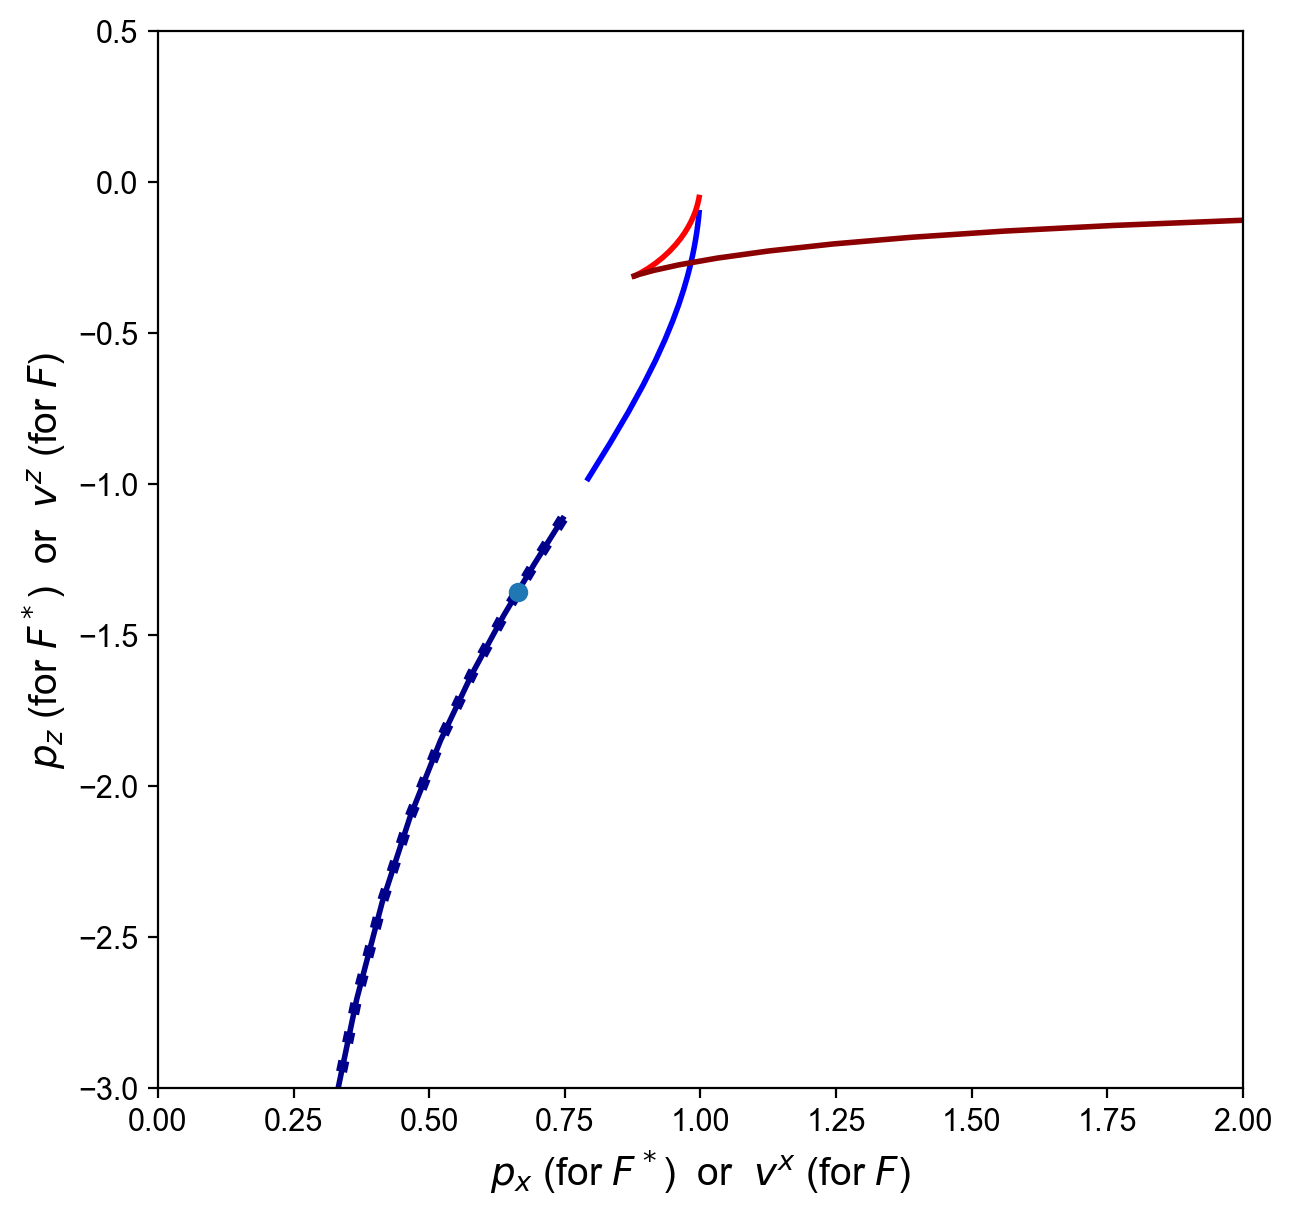

In [88]:
fig = gr.create_figure(job_name+'_Fstar_F_rectlinear', fig_size=(7,7))
plt.plot(p_supc_array[:,0],p_supc_array[:,1], 'Blue', lw=2, ls='-', 
         label=r'$F^*\!\!=1$,  $\beta\geq\beta_\mathrm{c}$')
plt.plot(p_infc_array[:,0],p_infc_array[:,1], 'DarkBlue', lw=2, ls='-', 
         label=r'$F^*\!\!=1$,  $\beta<\beta_\mathrm{c}$')

plt.plot(p_from_v_supc_array[:,0],p_from_v_supc_array[:,1], 'Blue', lw=4, ls='-', 
         label=r'$F^*\!\!=1$,  $\beta\geq\beta_\mathrm{c}$')
plt.plot(p_from_v_infc_array[:,0],p_from_v_infc_array[:,1], 'DarkBlue', lw=4, ls=':', 
         label=r'$F^*\!\!=1$,  $\beta<\beta_\mathrm{c}$')

plt.plot(v_supc_array[:,0],v_supc_array[:,1], 'Red', lw=2, ls='-', 
         label=r'$F=1$,  $\beta\geq\beta_\mathrm{c}$')
# plt.plot([0,vx_abcrit_],[0,vz_abcrit_], 
#          '-.', color='DarkRed', lw=1, label=r'$\alpha_{\mathrm{c}}$')
plt.plot(v_infc_array[:,0],v_infc_array[:,1], 'DarkRed', lw=2, 
         ls='-', 
         label=r'$F=1$,  $\beta<\beta_\mathrm{c}$')
plt.xlabel(r'$p_x$ (for $F^*$)  or  $v^x$ (for $F$)', fontsize=14)
plt.ylabel(r'$p_z$ (for $F^*$)  or  $v^z$ (for $F$)', fontsize=14)
plt.xlim(0,2)
plt.ylim(-3,0.5);
plt.plot(px_,pz_,'o')
px_,pz_

In [89]:
gmeq.eta